## Data Visualizations

In [141]:
from matplotlib import pyplot as plt
import numpy as np
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [7]:
path = "./data/"
file_list = os.listdir(path)
file_list

['A01T.npz',
 'A02T.npz',
 'A03T.npz',
 'A04T.npz',
 'A05T.npz',
 'A06T.npz',
 'A07T.npz',
 'A08T.npz',
 'A09T.npz']

In [10]:
data = np.load(path+file_list[0]) 

In [16]:
for key in data:
  print(key )

the key name is s
the key name is etyp
the key name is epos
the key name is edur
the key name is artifacts


## Visualizations For Channel C3 for subject A01T

In [19]:
signal = data['s']

In [21]:
np.shape(signal)

(672528, 25)

25 Channels

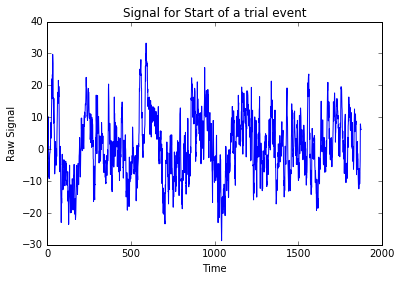

In [72]:
channelC3 = signal[:, 7]  # The index 7 represent the channel C3
x = 7
# Extract the type of the event 7 in this case the type is 768 (in the table this is a Start of a trial event).
etype = data['etyp'].T[0, x]
# This is the position of the event in the raw signal
epos = data['epos'].T[0, x]
edur = data['edur'].T[0, x]  # And this is the duration of this event

(len(data['epos']))
len(data['etyp'])
len(data['edur'])

# Then I extract the signal related the event selected.
trial = channelC3[epos:epos+edur]
len(trial)
plt.plot(trial)
plt.xlabel('Time')
plt.ylabel('Raw Signal')

plt.title("Signal for Start of a trial event")
plt.show()

772


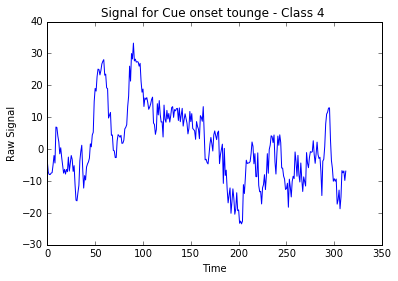

In [73]:
# Then for know the class of this trial (7) you need to read the type of the inmediate next event
trial_type = data['etyp'].T[0, x+1]
print(trial_type)
epos = data['epos'].T[0, x+1]
edur = data['edur'].T[0, x+1] 
trial = channelC3[epos:epos+edur]
plt.xlabel('Time')
plt.ylabel('Raw Signal')

plt.title("Signal for Cue onset tounge - Class 4 ")
plt.plot(trial)
plt.show()

769


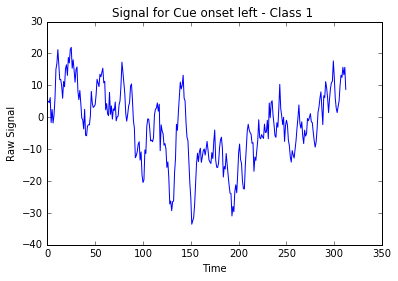

In [81]:
# Then for know the class of this trial (7) you need to read the type of the inmediate next event
x = 13
trial_type = data['etyp'].T[0, x+1]
print(trial_type)
epos = data['epos'].T[0, x+1]
edur = data['edur'].T[0, x+1] 
trial = channelC3[epos:epos+edur]
plt.xlabel('Time')
plt.ylabel('Raw Signal')

plt.title("Signal for Cue onset left - Class 1 ")
plt.plot(trial)
plt.show()

# TSNE


In [97]:
import numpy as np
from sklearn.manifold import TSNE

In [98]:
X = np.load("X_train.npy")
Y = np.load("Y_train.npy")

In [99]:
np.shape(X)

(2328, 176)

In [100]:
np.shape(Y)

(2328,)

In [101]:
Y[0]==2

True

In [102]:
v = TSNE(n_components=2).fit_transform(X)

### Other Plots


In [134]:
X = np.load("./LDA/X_val.npy")
Y = np.load("./LDA/Y_val.npy")
v = TSNE(n_components=2).fit_transform(X)

## Plotting the Features

In [104]:
import plotly
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [135]:
t1_0 = []
t1_1 = []

t2_0 = []
t2_1 = []

t3_0 = []
t3_1 = []

t4_0 = []
t4_1 = []


l = v.shape[0]
for i in range(0,l):
    if(Y[i]==0):
        t1_0.append(v[i][0])
        t1_1.append(v[i][1])
    if(Y[i]==1):
        t2_0.append(v[i][0])
        t2_1.append(v[i][1])
    if(Y[i]==2):
        t3_0.append(v[i][0])
        t3_1.append(v[i][1])
    if(Y[i]==3):
        t4_0.append(v[i][0])
        t4_1.append(v[i][1])

In [137]:
trace1 = go.Scatter(
    x = t1_0,
    y = t1_1,
    name = 'Class 1 : Tounge ',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(240,98,146, .8)',
        line = dict(
            width = 2,
            color = 'rgb(240,98,146)'
        )
    )
)

trace2 = go.Scatter(
    x = t2_0,
    y = t2_1,
    name = 'Class 2 : Feet',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(186,104,200, .8)',
        line = dict(
            width = 2,
            color = 'rgb(186,104,200)'
        )
    )
)

trace3 = go.Scatter(
    x = t3_0,
    y = t3_1,
    name = 'Class 3 : Left',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(156,204,101, .8)',
        line = dict(
            width = 2,
            color = 'rgb(156,204,101)'
        )
    )
)

trace4 = go.Scatter(
    x = t4_0,
    y = t4_1,
    name = 'Class 4 : Right',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255,241,118, .8)',
        line = dict(
            width = 2,
            color = 'rgb(255,241,118)'
        )
    )
)



data = [trace1,trace2, trace3, trace4, ]

layout = dict(title = 'Scatter Plot for Different Classes using LDA on validation set',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
plotly.offline.plot(fig, filename='styled-scatter')

C:\Anaconda3\lib\site-packages\plotly\offline\offline.py:459: UserWarning:

Your filename `styled-scatter` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\gyaneshanand\\Desktop\\SML Project\\styled-scatter.html'

In [ ]:
for i in range(22):
    f,psd = welch(X[0,i],250)
    plt.plot(f,psd)
    plt.set_title('Power Spectral Density')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (dB/Hz)')
    plt.savefig('PSD before filtering.png')

for l in range(len(Y)):
    Y[l] = labels[Y[l]]

# Pre-processing
X = preprocess(X)

# Visualization of filtered signal - how only one frequency band (8-24Hz) remains now.
for i in range(22):
    f,psd = welch(X[0,i,:],250)
    plt.set_title('Power Spectral Density')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (dB/Hz)')
    plt.plot(f,psd)
    plt.savefig('PSD after filtering.png')

## Class Conditional Density Plots


In [139]:
X = np.load("X_train.npy")
Y = np.load("Y_train.npy")
v = TSNE(n_components=2).fit_transform(X)

t1_0 = []
t1_1 = []

t2_0 = []
t2_1 = []

t3_0 = []
t3_1 = []

t4_0 = []
t4_1 = []


l = v.shape[0]
for i in range(0,l):
    if(Y[i]==0):
        t1_0.append(v[i][0])
        t1_1.append(v[i][1])
    if(Y[i]==1):
        t2_0.append(v[i][0])
        t2_1.append(v[i][1])
    if(Y[i]==2):
        t3_0.append(v[i][0])
        t3_1.append(v[i][1])
    if(Y[i]==3):
        t4_0.append(v[i][0])
        t4_1.append(v[i][1])

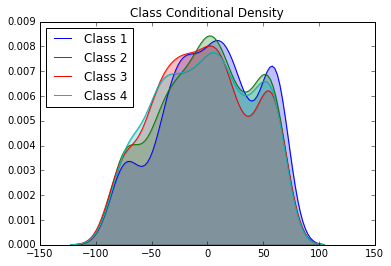

In [158]:
sns.distplot(t1_0, hist=False, rug=False,kde = True,kde_kws={"shade": True},label="Class 1").set_title('Class Conditional Density')
sns.distplot(t2_0, hist=False, rug=False,kde = True,kde_kws={"shade": True},label="Class 2")
sns.distplot(t3_0, hist=False, rug=False,kde = True,kde_kws={"shade": True},label="Class 3")
sns.distplot(t4_0, hist=False, rug=False,kde = True,kde_kws={"shade": True},label="Class 4")

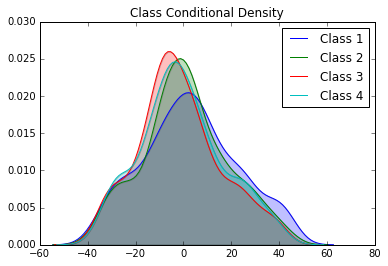

In [159]:
sns.distplot(t1_1, hist=False, rug=False,kde = True,kde_kws={"shade": True},label="Class 1").set_title('Class Conditional Density')
sns.distplot(t2_1, hist=False, rug=False,kde = True,kde_kws={"shade": True},label="Class 2")
sns.distplot(t3_1, hist=False, rug=False,kde = True,kde_kws={"shade": True},label="Class 3")
sns.distplot(t4_1, hist=False, rug=False,kde = True,kde_kws={"shade": True},label="Class 4")